### Objective

The objective of this project is to predict medical insurance costs using various machine learning models based on features such as age, sex, BMI, number of children, smoking status, and region. The aim is to determine which model best predicts insurance charges and to understand the impact of different features on these charges.

### Methodology

#### Data Loading and Exploration

The methodology begins with loading and exploring the dataset, `insurance.csv`, to understand its structure and content. Initial exploration involves checking the shape of the dataset and displaying the first few rows to get an overview of the data.

#### Data Visualization

Data visualization is then performed to analyze the distribution of categorical features like smoking status and gender. This helps in understanding the data better and identifying any potential patterns.

#### Data Preprocessing

Next, categorical variables are encoded into numeric values to facilitate model training. The data is then split into training and testing sets to evaluate model performance effectively.

#### Model Selection and Training

Various machine learning models are selected and trained, including:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Support Vector Regressor (SVR)
- K-Neighbors Regressor

Each model is trained on the training data and then evaluated on the test data using performance metrics such as Mean Squared Error (MSE) and R-squared (R²) score.

#### Model Evaluation

The model evaluation phase involves calculating the MSE and R² score for each model to determine their accuracy in predicting insurance charges.

#### Hyperparameter Tuning

Hyperparameter tuning is performed using GridSearchCV to optimize the parameters of the best-performing model, further enhancing its performance.

### Results

The results section includes the performance metrics for each model, comparison of model predictions with actual values, and visualization of model performance. Among the evaluated models, the Random Forest Regressor emerged as the best model with the lowest Mean Squared Error and the highest R² score, indicating its superior predictive capability compared to the other models. Specifically, the Random Forest Regressor achieved an R² score of approximately 0.85, demonstrating its effectiveness in accurately predicting insurance costs.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm


In [2]:
# Load the dataset
insurance_data = pd.read_csv('insurance.csv')

In [3]:
# Explore the data
print(insurance_data.shape)

(1338, 7)


In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.info()


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1338 entries, 0 to 1337

Data columns (total 7 columns):

 #   Column    Non-Null Count  Dtype  

---  ------    --------------  -----  

 0   age       1338 non-null   int64  

 1   sex       1338 non-null   object 

 2   bmi       1338 non-null   float64

 3   children  1338 non-null   int64  

 4   smoker    1338 non-null   object 

 5   region    1338 non-null   object 

 6   charges   1338 non-null   float64

dtypes: float64(2), int64(2), object(3)

memory usage: 73.3+ KB


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Check for missing values
print(insurance_data.isnull().sum())

age         0

sex         0

bmi         0

children    0

smoker      0

region      0

charges     0

dtype: int64


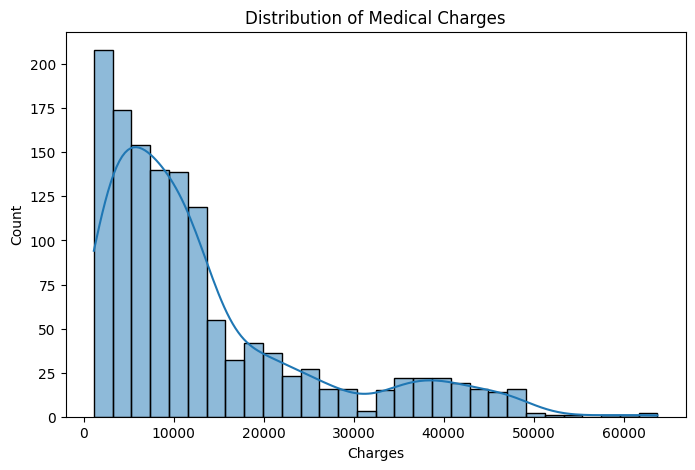

In [8]:
# Explore the distribution of 'charges' (target variable)
plt.figure(figsize=(8, 5))
sns.histplot(insurance_data['charges'], kde = True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


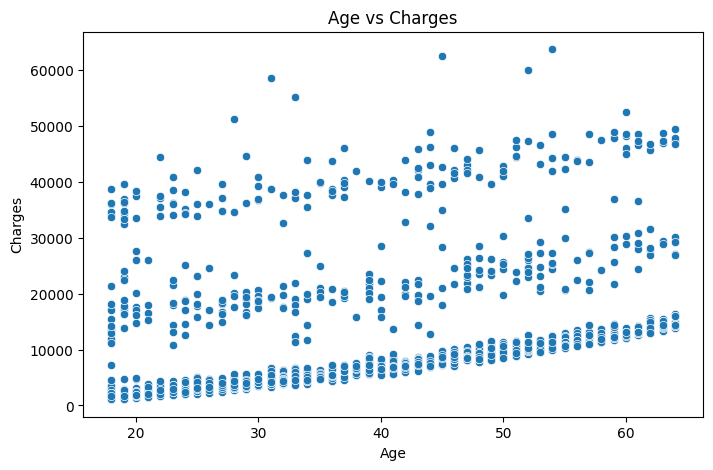

In [9]:
# Explore the relationship between 'age' and 'charges'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=insurance_data)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


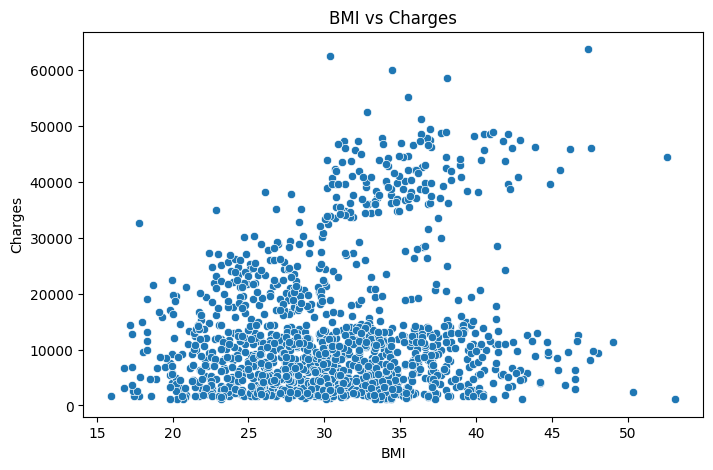

In [10]:
# Explore the relationship between 'bmi' and 'charges'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=insurance_data)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

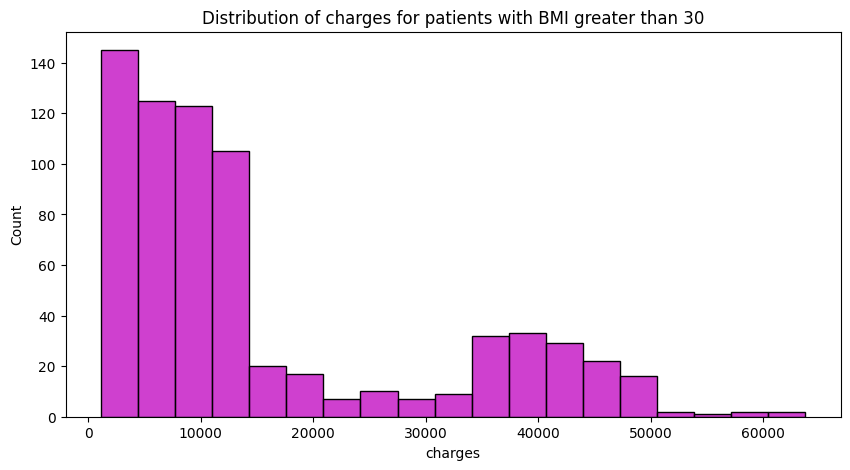

In [11]:
plt.figure(figsize=(10, 5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.histplot(insurance_data[insurance_data['bmi'] >= 30]['charges'], color='m')
plt.show()

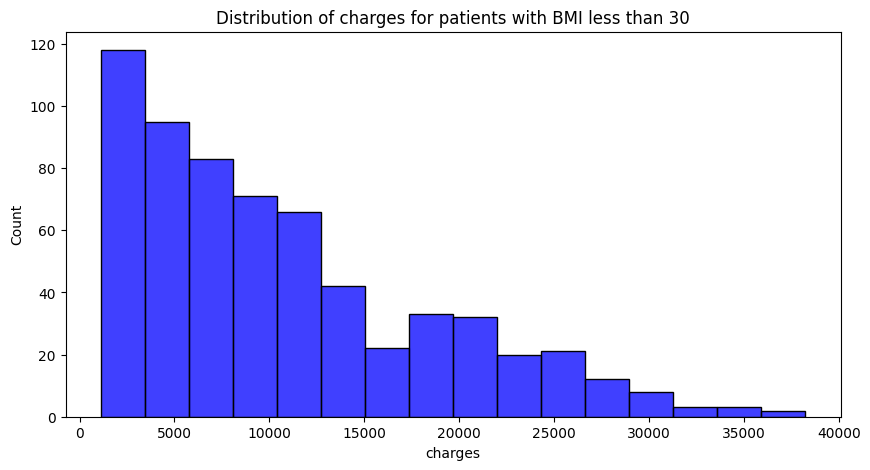

In [12]:
plt.figure(figsize=(10,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.histplot(insurance_data[(insurance_data.bmi < 30)]['charges'], color = 'b')

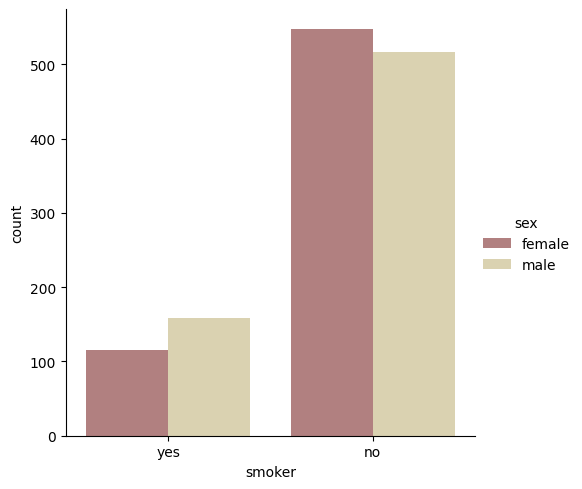

In [13]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=insurance_data)

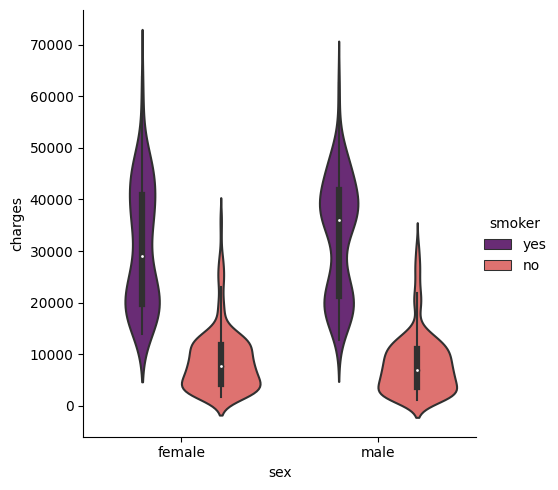

In [14]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=insurance_data, palette = 'magma')

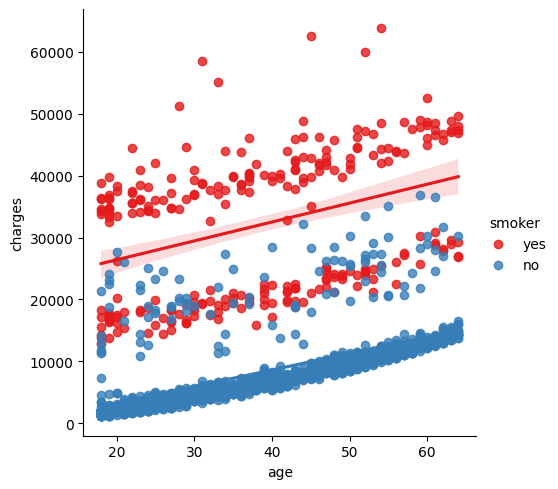

In [15]:
a = sns.lmplot(x = 'age', y = 'charges', data=insurance_data, hue='smoker', palette='Set1')

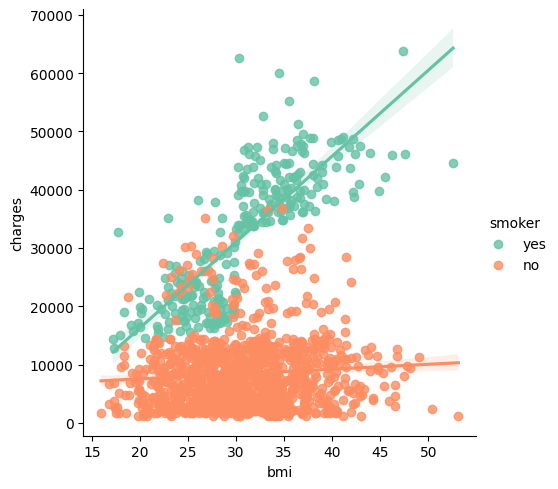

In [16]:
b = sns.lmplot(x = 'bmi', y = 'charges', data=insurance_data, hue='smoker', palette='Set2')

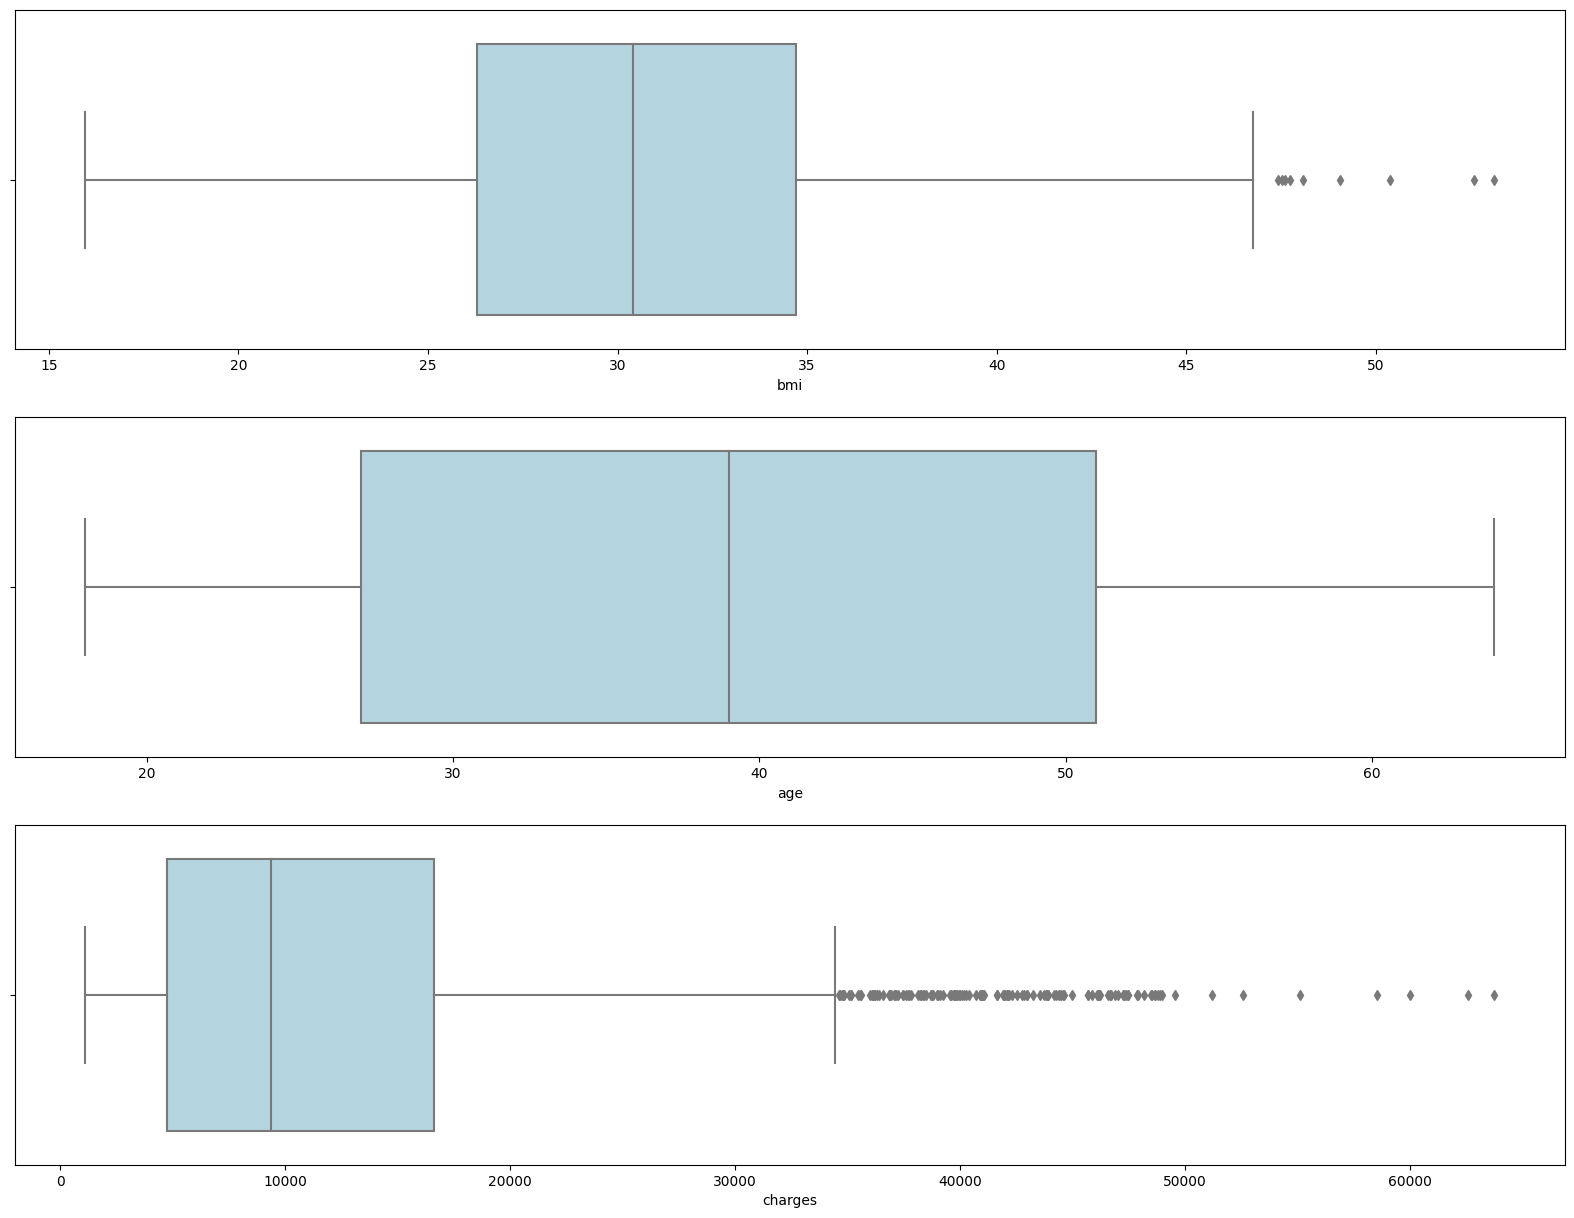

In [17]:
#Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_data.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_data.charges, color='lightblue')

plt.show()

Text(0.5, 1.0, 'Smoker distribution')

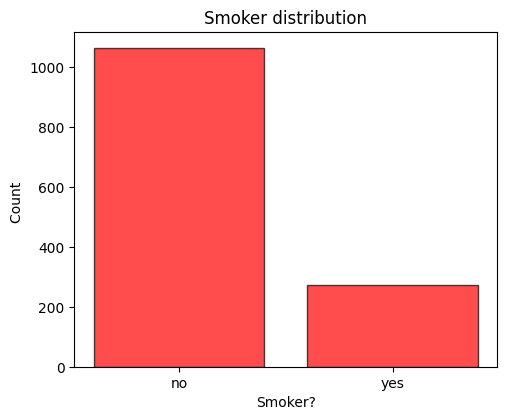

In [18]:
plt.figure(figsize=(12,20))


x = insurance_data.smoker.value_counts().index    #Values for x-axis
y = [insurance_data['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')



Text(0.5, 1.0, 'Gender distribution')

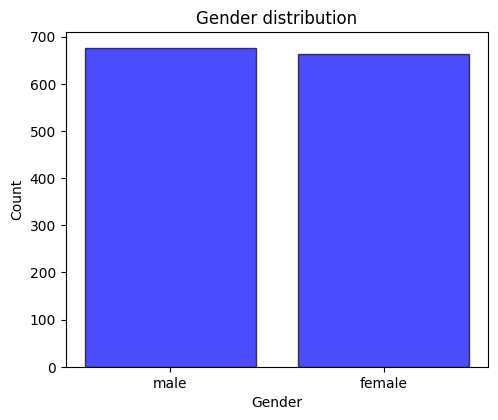

In [19]:
plt.figure(figsize=(12,20))

x1 = insurance_data.sex.value_counts().index    #Values for x-axis
y1 = [insurance_data['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')


Text(0.5, 1.0, "Regions' distribution")

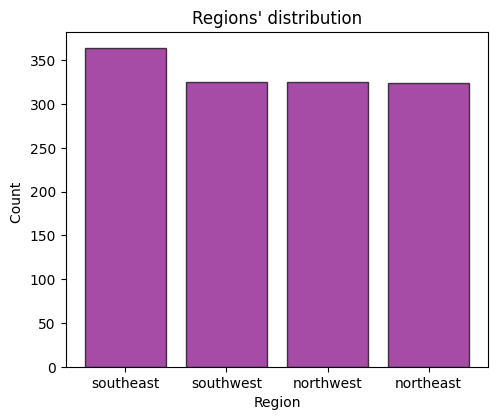

In [20]:
plt.figure(figsize=(12,20))

x2 = insurance_data.region.value_counts().index    #Values for x-axis
y2 = [insurance_data['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")


Text(0.5, 1.0, 'Children distribution')

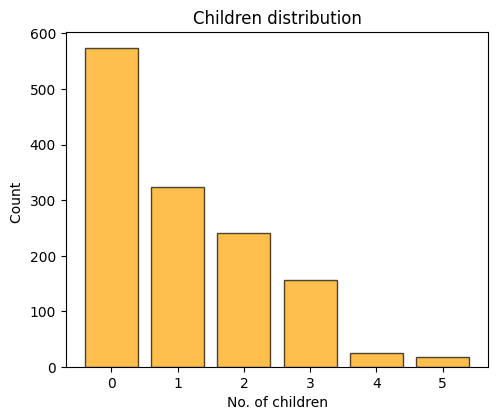

In [21]:
plt.figure(figsize=(12,20))

x3 = insurance_data.children.value_counts().index    #Values for x-axis
y3 = [insurance_data['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'orange',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

In [22]:
insurance_data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

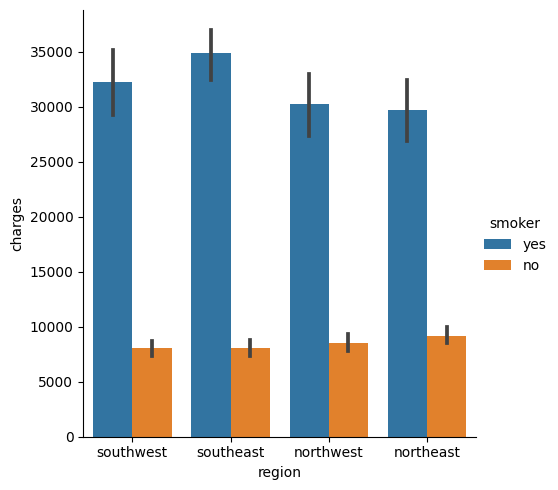

In [23]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=insurance_data)
plt.show()

In [24]:
# Convert categorical variables to numerical using one hot encoding
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])

In [25]:
insurance_data.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female             bool
sex_male               bool
smoker_no              bool
smoker_yes             bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [26]:
insurance_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [27]:
insurance_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [28]:
insurance_data.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


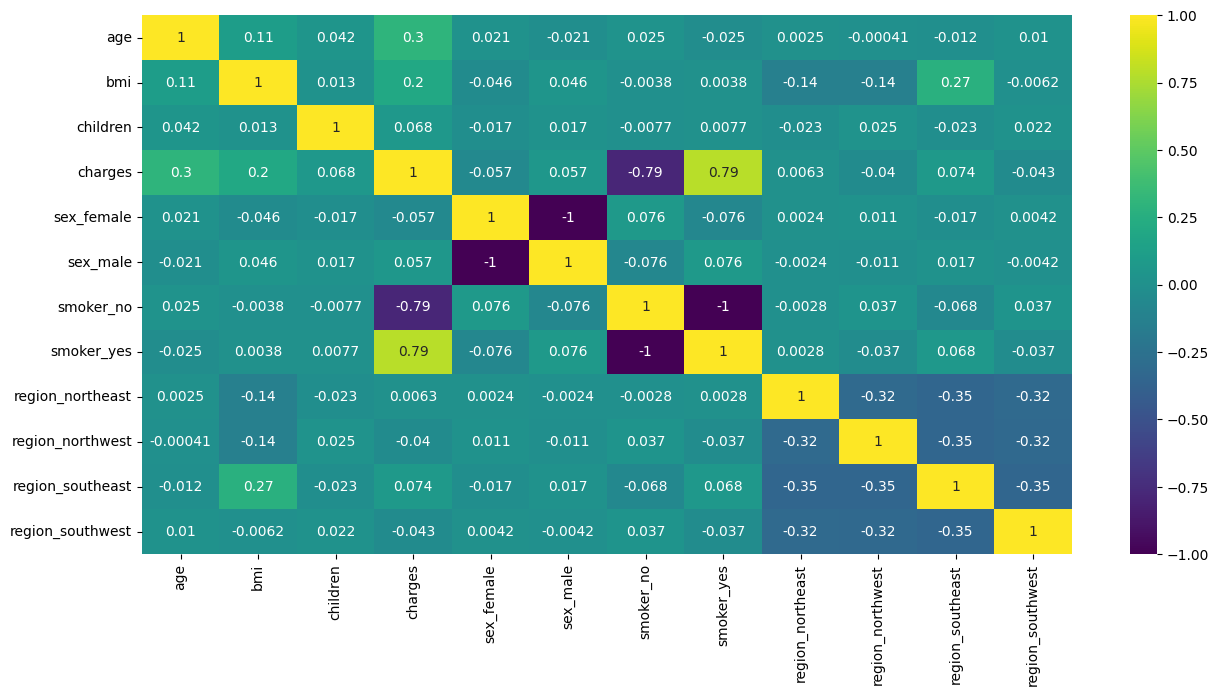

In [29]:
correlation_Matrix = insurance_data.corr() 
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_Matrix, annot=True, cmap='viridis') 
plt.show() 

In [30]:
columns_to_convert = ['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

for column in columns_to_convert:
    insurance_data[column] = insurance_data[column].astype(int)


In [31]:
insurance_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [32]:
# Split the data into features (X) and target variable (y)
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']


# Create an OLS model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the summary statistics of the model
print(results.summary())


                            OLS Regression Results                            


Dep. Variable:                charges   R-squared:                       0.751

Model:                            OLS   Adj. R-squared:                  0.749

Method:                 Least Squares   F-statistic:                     500.8

Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00

Time:                        17:03:01   Log-Likelihood:                -13548.

No. Observations:                1338   AIC:                         2.711e+04

Df Residuals:                    1329   BIC:                         2.716e+04

Df Model:                           8                                         

Covariance Type:            nonrobust                                         


                       coef    std err          t      P>|t|      [0.025      0.975]

------------------------------------------------------------------------------------

age                256.856

In [33]:
# Define the feature matrix
X = insurance_data.drop('charges', axis=1)
# Define the target variable
y = insurance_data['charges']

#Feature Selection

# Function to perform Stepwise Regression
def stepwise_regression(X, y, pvalue_threshold=0.05):
    selected_features = []
    
    while True:
        remaining_features = list(set(X.columns) - set(selected_features))
        best_pvalue = 1.0
        best_feature = None
        
        for i in remaining_features:
            current_features = selected_features + [i]
            X_constant = sm.add_constant(X[current_features])
            model = sm.OLS(y, X_constant)
            results = model.fit()
            pvalue = results.pvalues[i]
            
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = i
        
        if best_pvalue > pvalue_threshold:
            break
        
        selected_features.append(best_feature)
        print(results.summary())
    
    return selected_features

# Perform Stepwise Regression
selected_features = stepwise_regression(X, y)
print("Selected Features:", selected_features)


                            OLS Regression Results                            


Dep. Variable:                charges   R-squared:                       0.620

Model:                            OLS   Adj. R-squared:                  0.619

Method:                 Least Squares   F-statistic:                     2178.

Date:                Thu, 14 Dec 2023   Prob (F-statistic):          8.27e-283

Time:                        17:03:06   Log-Likelihood:                -13831.

No. Observations:                1338   AIC:                         2.767e+04

Df Residuals:                    1336   BIC:                         2.768e+04

Df Model:                           1                                         

Covariance Type:            nonrobust                                         


                 coef    std err          t      P>|t|      [0.025      0.975]

------------------------------------------------------------------------------

const       3.205e+04    451.292     7

In [34]:
features = pd.DataFrame({"Selected Features": selected_features})
features.head(6)

,Selected Features
0,smoker_no
1,age
2,smoker_yes
3,bmi
4,children
5,region_northeast


In [35]:
# Define the feature matrix
X = insurance_data[['smoker_no', 'age', 'smoker_yes', 'bmi', 'children', 'region_northeast']]
# Define the target variable
y = insurance_data['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Training Model
    
    # Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Checking regression metrics
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)

    model_train_r2 = r2_score(y_train, y_train_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model Performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('Model Performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('=' * 35)
    print('\n')

Linear Regression

Model Performance for Training set

- Mean Squared Error: 37301509.7188

- R2 Score: 0.7416

Model Performance for Test set

- Mean Squared Error: 33742677.1201

- R2 Score: 0.7827






Decision Tree

Model Performance for Training set

- Mean Squared Error: 244463.0320

- R2 Score: 0.9983

Model Performance for Test set

- Mean Squared Error: 40933550.6605

- R2 Score: 0.7363






Random Forest

Model Performance for Training set

- Mean Squared Error: 3738711.9944

- R2 Score: 0.9741

Model Performance for Test set

- Mean Squared Error: 21478546.2128

- R2 Score: 0.8617






Support Vector Machine

Model Performance for Training set

- Mean Squared Error: 158439543.2221

- R2 Score: -0.0977

Model Performance for Test set

- Mean Squared Error: 166473706.7185

- R2 Score: -0.0723






K-Nearest Neighbors

Model Performance for Training set

- Mean Squared Error: 66296079.6808

- R2 Score: 0.5407

Model Performance for Test set

- Mean Squared Error: 110033472.

In [44]:
from sklearn.model_selection import GridSearchCV

#Hyper parameter tuning
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range)
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_rf_model1 = grid_search.best_estimator_

# Making Predictions
y_train_pred_best = best_rf_model1.predict(X_train)
y_test_pred_best = best_rf_model1.predict(X_test)

# Checking regression metrics for the best model
best_model_train_mse = mean_squared_error(y_train, y_train_pred_best)
best_model_test_mse = mean_squared_error(y_test, y_test_pred_best)

best_model_train_r2 = r2_score(y_train, y_train_pred_best)
best_model_test_r2 = r2_score(y_test, y_test_pred_best)

print('Best Random Forest Regressor Model')
print('Best Hyperparameters:', best_params)
print('Model Performance for Training set')
print("- Mean Squared Error: {:.4f}".format(best_model_train_mse))
print("- R2 Score: {:.4f}".format(best_model_train_r2))

print('Model Performance for Test set')
print("- Mean Squared Error: {:.4f}".format(best_model_test_mse))
print("- R2 Score: {:.4f}".format(best_model_test_r2))

Best Random Forest Regressor Model

Best Hyperparameters: {'max_features': 3, 'n_estimators': 200}

Model Performance for Training set

- Mean Squared Error: 3432086.8463

- R2 Score: 0.9762

Model Performance for Test set

- Mean Squared Error: 19783638.9859

- R2 Score: 0.8726


In [45]:
# Displaying actual vs predicted for the first 10 rows
results_df_best = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_best})
print('Best Random Forest Regressor Model Results:')

results_df_best.head(10)

Best Random Forest Regressor Model Results:


,Actual,Predicted
764,9095.06825,11007.350864
887,5272.17580,5585.345830
890,29330.98315,29026.211969
1293,9301.89355,10239.531509
259,33750.29180,34546.741821
1312,4536.25900,8640.287052
899,2117.33885,1639.136040
752,14210.53595,13945.269158
1286,3732.62510,4896.872645
707,10264.44210,10369.450486


### Conclusion

In conclusion, the notebook successfully identifies the Random Forest Regressor as the most effective model for predicting medical insurance costs. This model's high R² score and low MSE highlight its accuracy and reliability. The analysis also underscores the importance of features such as smoking status, BMI, and age in determining insurance charges. Future work could explore further feature engineering, the inclusion of additional relevant features, and the use of advanced machine learning techniques to potentially improve prediction accuracy even further.